In [275]:
import random
# import time
# import sys
# import pygame
import numpy as np
import plotly.graph_objects as go


class Charge:
    def __init__(self, x, y, q):
        self.x = x
        self.y = y
        self.q = q
        self.color = (int(random.random() * 255), int(random.random() * 255), int(random.random() * 255))

    def potential_in_point(self, x, y):
        return self.q/np.sqrt((self.x - x)**2 + (self.y - y)**2)

    
N = 2
coord_max_x = 10
coord_min_x = 1
coord_max_y = 10
coord_min_y = 1
q = 50

#charges = [Charge( (coord_max + coord_min)/2, 30 * num, q if num%2==0 else -q ) for num in range(1, N + 1)]
charges = [Charge(4,4.1,q), Charge(4,6.1,-q)]
xs = np.linspace(coord_min_x,coord_max_x,100)
ys = np.linspace(coord_min_y,coord_max_y,100)
pots = []
for x in xs:
    p = []
    for y in ys:
        pot = 0
        for charge in charges:
            if x == charge.x and y == charge.y:
                continue
            pot += charge.potential_in_point(x, y)
       # print(x,y,pot)
        p.append(pot)
    pots.append(p)
pots = np.array(pots)
clim0,clim1 = -100,100
pots[np.where(pots<clim0)] = clim0*0.999999
pots[np.where(pots>clim1)] = clim1*0.999999
fig = go.Figure(data =
    go.Contour(
        z=pots,
        x=xs,
        y=ys ))

fig.show()
for charge in charges:
    print(charge.x, charge.y)

4 4.1
4 6.1


In [52]:
xs, ys

(array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
         1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
         2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
         3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
         4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
         5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
         6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
         7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
         8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
         9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ]),
 array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
         1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
         2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
         3.06122449,  3.26530612,  3.46938776,  3

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import ode as ode
from matplotlib import cm
from itertools import product
class charge:
    def __init__(self, q, pos):
        self.q = q
        self.pos = pos

class line:
    def __init__(self,pos ,b=1):
        self.b = b
        self.pos=  pos

def V_line_charge(b, pos, x, y, r0=1):
    return -2*b*np.log(((x-pos[0])**2+(y-pos[1])**2)**(0.5) / r0)

def V_point_charge(q, pos, x, y):
    return q/((x-pos[0])**2+(y-pos[1])**2)**(0.5)
        
def V_total(x, y, charges):
    V=0
    for C in charges:
        Vp=V_point_charge(C.q, C.pos, x, y)
        V = V+Vp
    return V

def V_total_lines(x, y, lines):
    V=0
    for line in lines:
        Vp = V_line_charge(line.b, line.pos, x, y)
        V = V+Vp
    return V



In [4]:
charges=[ charge(1, [0, -1]), charge(-1, [0,1]) ]
 
x0, x1=-3, 3
y0, y1=-3, 3

In [5]:
vs = []
xs = []
ys = []
numcalcv = 100
for xx,yy in product(np.linspace(x0,x1,numcalcv),np.linspace(y0,y1,numcalcv)):
    xs.append(xx)
    ys.append(yy)
    vs.append(V_total(xx,yy,charges))
xs = np.array(xs)
ys = np.array(ys)
vs = np.array(vs)

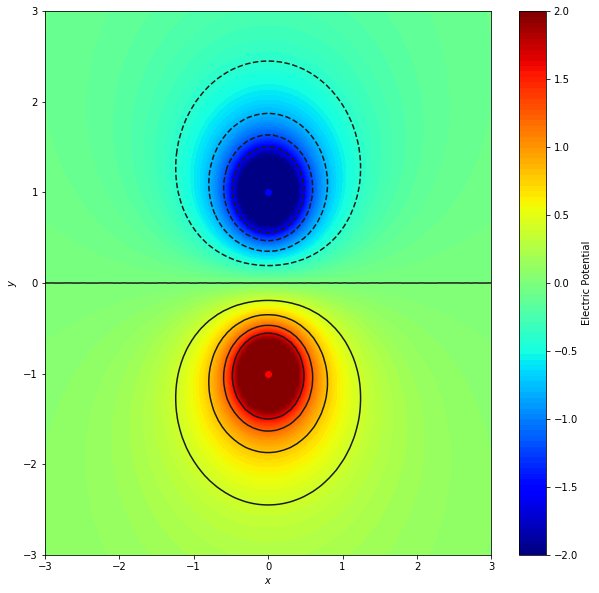

In [6]:
plt.figure(figsize=(10, 10))

for C in charges:
    if C.q>0:
        plt.plot(C.pos[0], C.pos[1], 'ro')
    if C.q<0:
        plt.plot(C.pos[0], C.pos[1], 'bo')


clim0,clim1 = -2,2
vs[np.where(vs<clim0)] = clim0*0.999999
vs[np.where(vs>clim1)] = clim1*0.999999
plt.tricontour(xs,ys,vs,10,colors="0.1")
plt.tricontourf(xs,ys,vs,100,cmap=cm.jet)
cbar = plt.colorbar()
cbar.set_ticks([-2,-1.5,-1,-0.5,0,0.5,1,1.5,2])
cbar.set_label("Electric Potential")
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xlim(x0, x1)
plt.ylim(y0, y1)

plt.show()

In [7]:
lines=[ line([1, -1], 1), line([1, 1], 1) ]
 
x0, x1=-3, 3
y0, y1=-3, 3
vs = []
xs = []
ys = []
numcalcv = 100
for xx,yy in product(np.linspace(x0,x1,numcalcv),np.linspace(y0,y1,numcalcv)):
    xs.append(xx)
    ys.append(yy)
    vs.append(V_total_lines(xx,yy,lines))
xs = np.array(xs)
ys = np.array(ys)
vs = np.array(vs)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


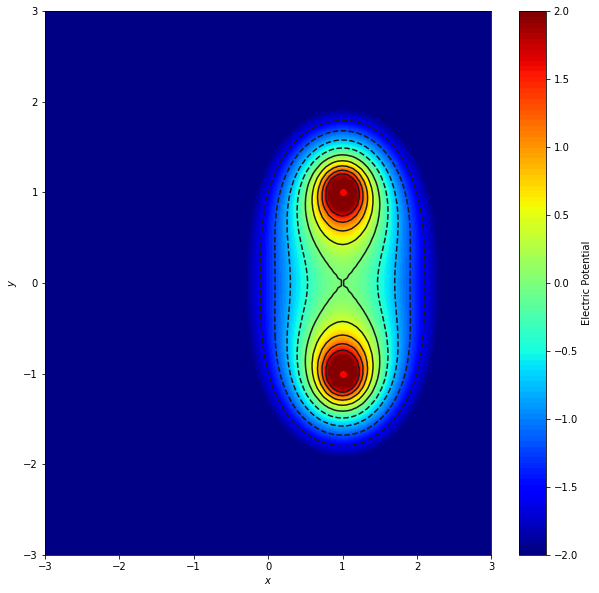

In [8]:
plt.figure(figsize=(10, 10))

for l in lines:
    if l.b>0:
        plt.plot(l.pos[0], l.pos[1], 'ro')
    if l.b<0:
        plt.plot(l.pos[0], l.pos[1], 'bo')


clim0,clim1 = -2,2
vs[np.where(vs<clim0)] = clim0*0.999999
vs[np.where(vs>clim1)] = clim1*0.999999
plt.tricontour(xs,ys,vs,10,colors="0.1")
plt.tricontourf(xs,ys,vs,100,cmap=cm.jet)
cbar = plt.colorbar()
cbar.set_ticks([-2,-1.5,-1,-0.5,0,0.5,1,1.5,2])
cbar.set_label("Electric Potential")
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xlim(x0, x1)
plt.ylim(y0, y1)

plt.show()

In [14]:
lines=[ line([x, y], 1) for x in np.linspace(1,-1,50) for y in [1, -1] ]
 
x0, x1=-3, 3
y0, y1=-3, 3
vs = []
xs = []
ys = []
numcalcv = 100
for xx,yy in product(np.linspace(x0,x1,numcalcv),np.linspace(y0,y1,numcalcv)):
    xs.append(xx)
    ys.append(yy)
    vs.append(V_total_lines(xx,yy,lines))
xs = np.array(xs)
ys = np.array(ys)
vs = np.array(vs)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


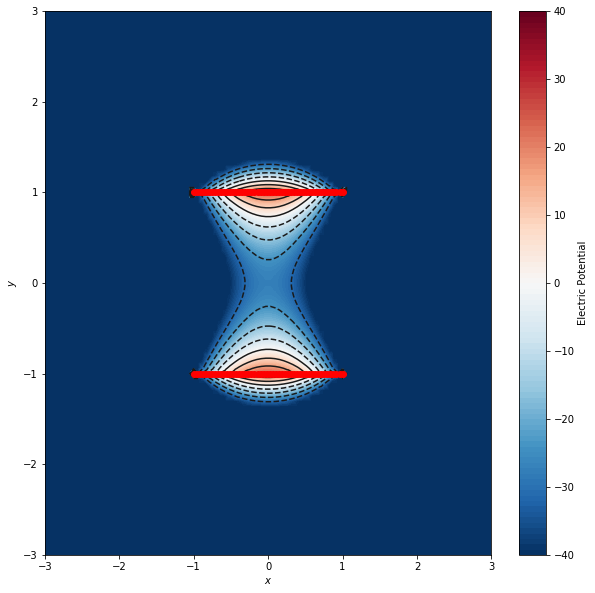

In [17]:
plt.figure(figsize=(10, 10))

for l in lines:
    if l.b>0:
        plt.plot(l.pos[0], l.pos[1], 'ro')
    if l.b<0:
        plt.plot(l.pos[0], l.pos[1], 'bo')


clim0,clim1 = -40,40
vs[np.where(vs<clim0)] = clim0*0.999999
vs[np.where(vs>clim1)] = clim1*0.999999
plt.tricontour(xs,ys,vs,10,colors="0.1")
plt.tricontourf(xs,ys,vs,100,cmap=cm.RdBu_r)
cbar = plt.colorbar()
cbar.set_ticks([i * 20 for i in [-2,-1.5,-1,-0.5,0,0.5,1,1.5,2]])
cbar.set_label("Electric Potential")
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xlim(x0, x1)
plt.ylim(y0, y1)

plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


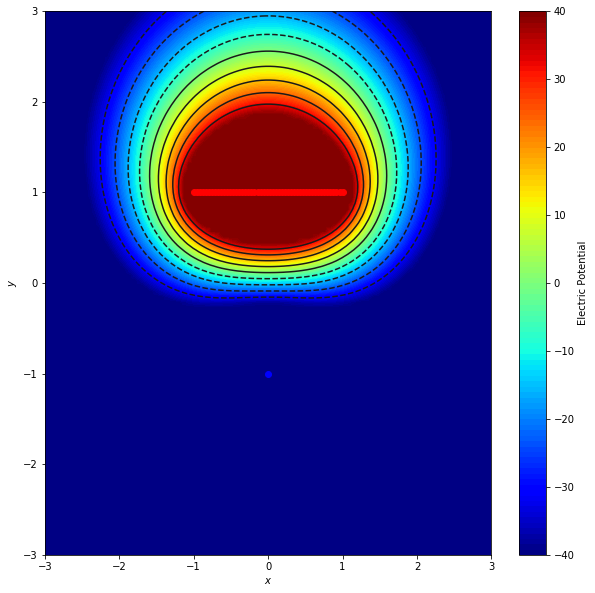

In [11]:
lines=[ line([x, 1], 1) for x in np.linspace(1,-1,50)]
lines.append(line([0,-1], -20))
 
x0, x1=-3, 3
y0, y1=-3, 3
vs = []
xs = []
ys = []
numcalcv = 100
for xx,yy in product(np.linspace(x0,x1,numcalcv),np.linspace(y0,y1,numcalcv)):
    xs.append(xx)
    ys.append(yy)
    vs.append(V_total_lines(xx,yy,lines))
xs = np.array(xs)
ys = np.array(ys)
vs = np.array(vs)
plt.figure(figsize=(10, 10))

for l in lines:
    if l.b>0:
        plt.plot(l.pos[0], l.pos[1], 'ro')
    if l.b<0:
        plt.plot(l.pos[0], l.pos[1], 'bo')


clim0,clim1 = -40,40
vs[np.where(vs<clim0)] = clim0*0.999999
vs[np.where(vs>clim1)] = clim1*0.999999
plt.tricontour(xs,ys,vs,10,colors="0.1")
plt.tricontourf(xs,ys,vs,100,cmap=cm.jet)
cbar = plt.colorbar()
cbar.set_ticks([i * 20 for i in [-2,-1.5,-1,-0.5,0,0.5,1,1.5,2]])
cbar.set_label("Electric Potential")
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xlim(x0, x1)
plt.ylim(y0, y1)

plt.show()